### EDA 대상
- 도메인: 네이버 쇼핑의 장보기 탭
- 쇼핑몰: `이마트몰`, `이마트 에브리데이`, `홈플러스`, `GS THE FRESH`

<br>  

### 확인해야 할 요소
- 이미지 개수: 상품별 처리해야 할 이미지의 개수의 평균
- 구분 단위(img + txt): 이미지 내 텍스트가 존재하는 경우, OCR 및 VLM 필요 여부 파악
- 이미지-텍스트 구성: 이미지 외 텍스트에서 제공하는 정보의 형태 파악
- 성분 정보: 제공 형태(이미지, 텍스트, 이미지+텍스트, 제공 안 함)
- 성분 표기 가독성: 성분 정보를 제공하는 경우에 선명, 흐림, 깨짐 파악
- 보관 정보: 이미지, 텍스트, 제공 안 함
- 교환/반품 정보: 이미지, 텍스트, 제공 안 함
- 배송 정보: 이미지, 텍스트, 제공 안 함

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import rc
import matplotlib.pyplot as plt

rc("font", family="AppleGothic")
plt.rcParams["axes.unicode_minus"] = False
seaborn_color = sns.color_palette("pastel") # Set2, pastel

total_df = pd.read_csv("eda1.csv").dropna(subset=["idx"])
malls = list(set([id_.split("-")[0] for id_ in total_df["idx"].to_list()]))

for mall in malls:
    num = total_df["idx"].str.contains(mall).sum()
    num_img = int(total_df.loc[total_df["idx"].str.contains(mall), "이미지 개수"].sum())
    print(f"{mall}: 상품 {num}개, 평균 이미지 {round(num_img/num, 2)}개")

emarteveryday: 상품 599개, 평균 이미지 2.29개
homeplus: 상품 600개, 평균 이미지 3.59개
emart: 상품 1242개, 평균 이미지 3.84개
gsthefresh: 상품 651개, 평균 이미지 2.49개


### 구분 단위
- 이미지 내 텍스트 존재 여부 파악
- OCR+LLM, VLM 사용 여부 파악

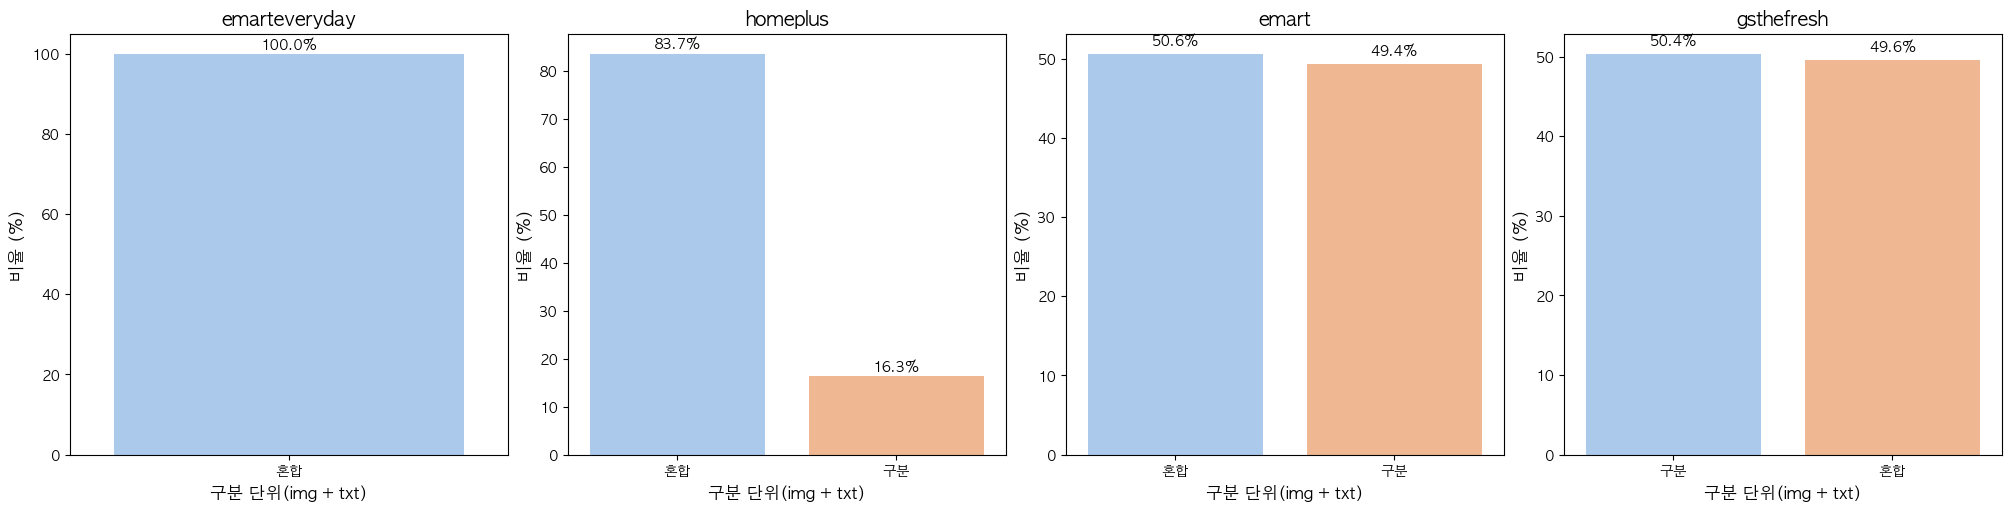

In [9]:
num_malls = len(malls)
fig, axes = plt.subplots(1, num_malls, figsize=(5 * num_malls, 5), constrained_layout=True)

for i, mall in enumerate(malls):
    mall_df = total_df[total_df["idx"].str.contains(mall)]
    
    if mall_df.empty:
        continue  # 데이터 없으면 스킵

    # 구분 단위(img + txt) 비율 계산
    ratio_df = mall_df["구분 단위(img + txt)"].value_counts(normalize=True) * 100

    palette = sns.color_palette("pastel", n_colors=ratio_df.index.nunique())
    sns.barplot(ax=axes[i], x=ratio_df.index, y=ratio_df.values, palette=palette, hue=ratio_df.index, legend=False)

    # 제목 및 라벨 설정
    axes[i].set_title(f"{mall}", fontsize=14)
    axes[i].set_xlabel("구분 단위(img + txt)", fontsize=12)
    axes[i].set_ylabel("비율 (%)", fontsize=12)
    # axes[i].set_xticklabels(ratio_df.index, rotation=45)  # X축 레이블 회전

    # 값 표시
    for j, v in enumerate(ratio_df.values):
        axes[i].text(j, v + 1, f"{v:.1f}%", ha="center", fontsize=10)

# 전체 그래프 출력
plt.show()


### 성분 정보 & 성분 표기 가독성
- 성분 정보를 제공하지 않는 개수 파악
- 성분 표기 가독성 종류에 따른 비율 파악

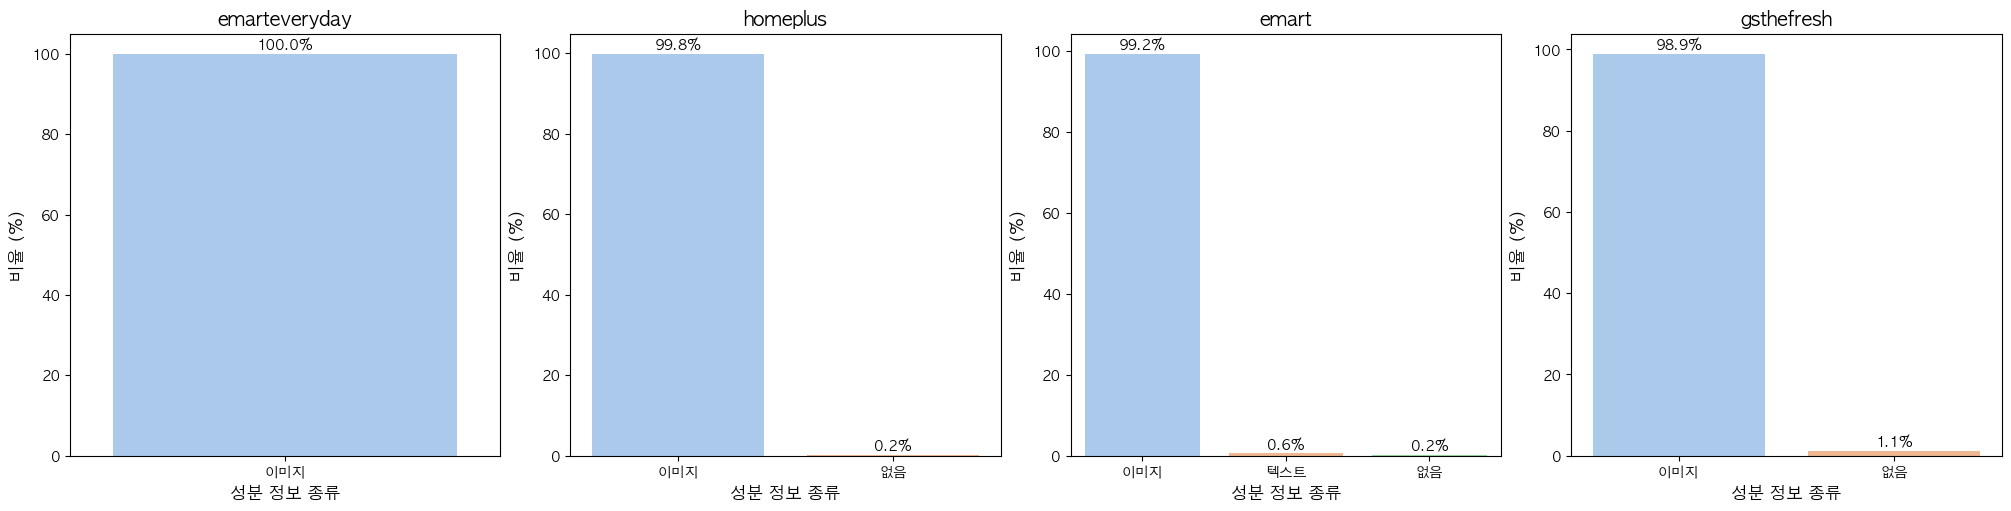

In [8]:
num_malls = len(malls)
fig, axes = plt.subplots(1, num_malls, figsize=(5 * num_malls, 5), constrained_layout=True)

for i, mall in enumerate(malls):
    mall_df = total_df[total_df["idx"].str.contains(mall)]
    
    if mall_df.empty:
        continue

    ratio_df = mall_df["성분 정보"].value_counts(normalize=True) * 100

    palette = sns.color_palette("pastel", n_colors=ratio_df.index.nunique())
    sns.barplot(ax=axes[i], x=ratio_df.index, y=ratio_df.values, palette=palette, hue=ratio_df.index, legend=False)

    axes[i].set_title(f"{mall}", fontsize=14)
    axes[i].set_xlabel("성분 정보 종류", fontsize=12)
    axes[i].set_ylabel("비율 (%)", fontsize=12)
    # axes[i].set_xticklabels(ratio_df.index, rotation=45)  # X축 레이블 회전

    # 값 표시
    for j, v in enumerate(ratio_df.values):
        axes[i].text(j, v + 1, f"{v:.1f}%", ha="center", fontsize=10)

# 전체 그래프 출력
plt.show()

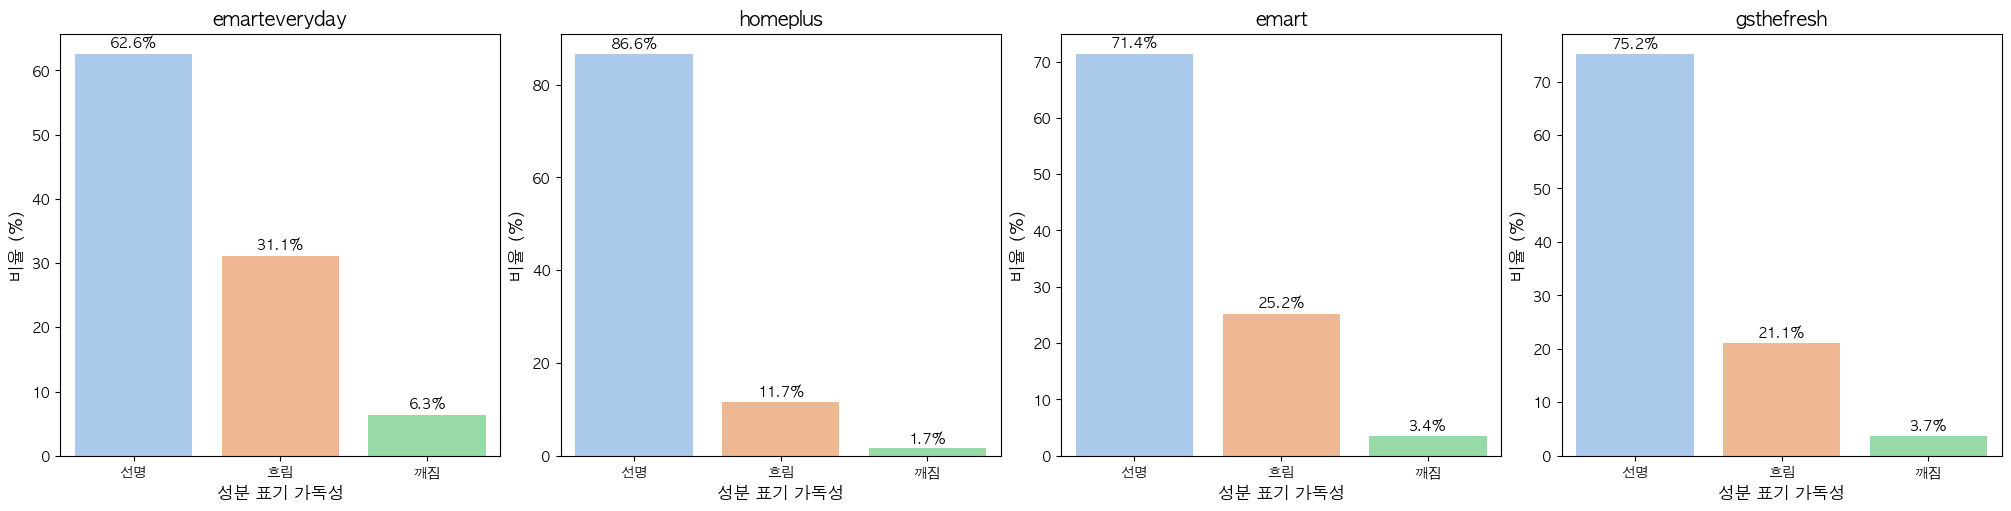

In [10]:
num_malls = len(malls)
fig, axes = plt.subplots(1, num_malls, figsize=(5 * num_malls, 5), constrained_layout=True)

for i, mall in enumerate(malls):
    mall_df = total_df[total_df["idx"].str.contains(mall)]
    
    if mall_df.empty:
        continue

    ratio_df = mall_df["성분 표기 가독성"].value_counts(normalize=True) * 100

    palette = sns.color_palette("pastel", n_colors=ratio_df.index.nunique())
    sns.barplot(ax=axes[i], x=ratio_df.index, y=ratio_df.values, palette=palette, hue=ratio_df.index, legend=False)

    axes[i].set_title(f"{mall}", fontsize=14)
    axes[i].set_xlabel("성분 표기 가독성", fontsize=12)
    axes[i].set_ylabel("비율 (%)", fontsize=12)
    # axes[i].set_xticklabels(ratio_df.index, rotation=45)  # X축 레이블 회전

    # 값 표시
    for j, v in enumerate(ratio_df.values):
        axes[i].text(j, v + 1, f"{v:.1f}%", ha="center", fontsize=10)

# 전체 그래프 출력
plt.show()

### 보관 정보
- 보관 정보 제공 형태 파악

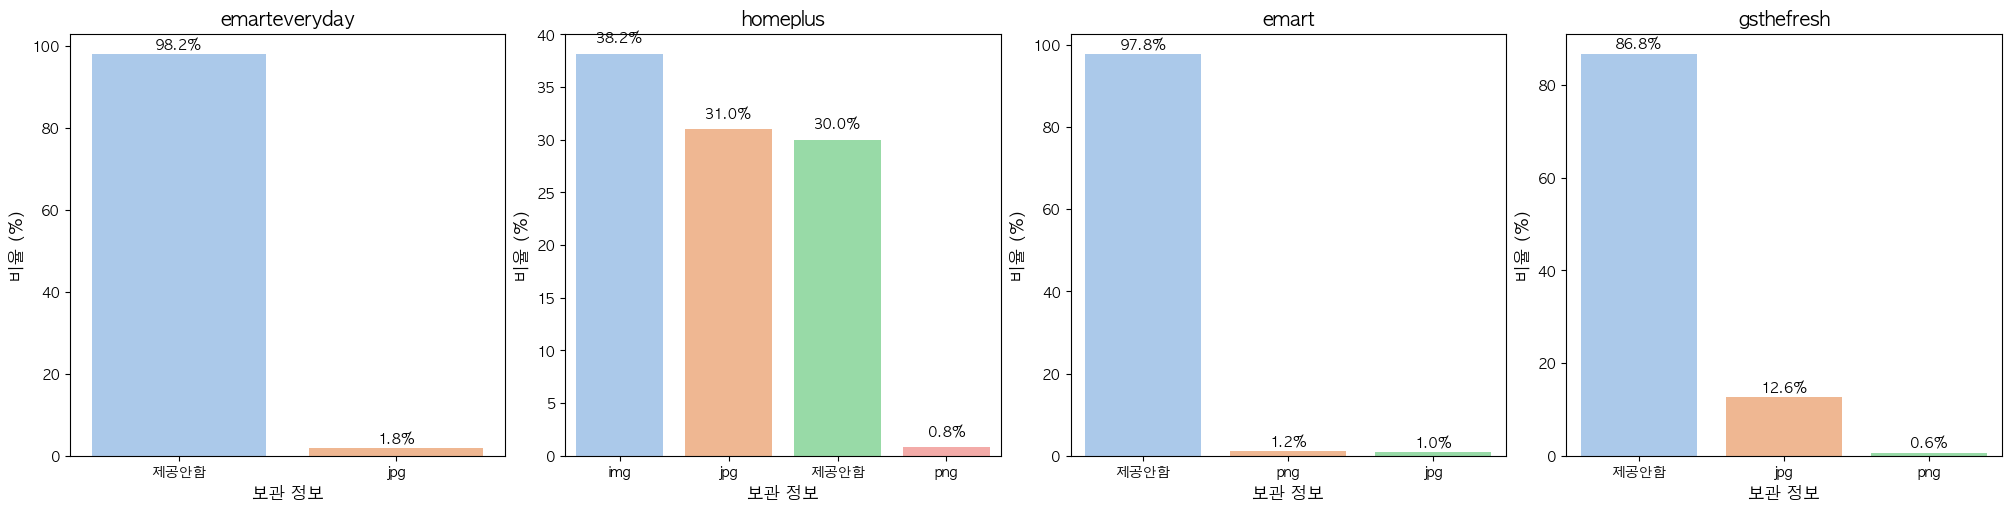

In [11]:
num_malls = len(malls)
fig, axes = plt.subplots(1, num_malls, figsize=(5 * num_malls, 5), constrained_layout=True)

for i, mall in enumerate(malls):
    mall_df = total_df[total_df["idx"].str.contains(mall)]
    
    if mall_df.empty:
        continue

    ratio_df = mall_df["보관 정보"].value_counts(normalize=True) * 100

    palette = sns.color_palette("pastel", n_colors=ratio_df.index.nunique())
    sns.barplot(ax=axes[i], x=ratio_df.index, y=ratio_df.values, palette=palette, hue=ratio_df.index, legend=False)

    axes[i].set_title(f"{mall}", fontsize=14)
    axes[i].set_xlabel("보관 정보", fontsize=12)
    axes[i].set_ylabel("비율 (%)", fontsize=12)
    # axes[i].set_xticklabels(ratio_df.index, rotation=45)  # X축 레이블 회전

    # 값 표시
    for j, v in enumerate(ratio_df.values):
        axes[i].text(j, v + 1, f"{v:.1f}%", ha="center", fontsize=10)

# 전체 그래프 출력
plt.show()

### 교환/반품 정보
- 제공 형태 파악

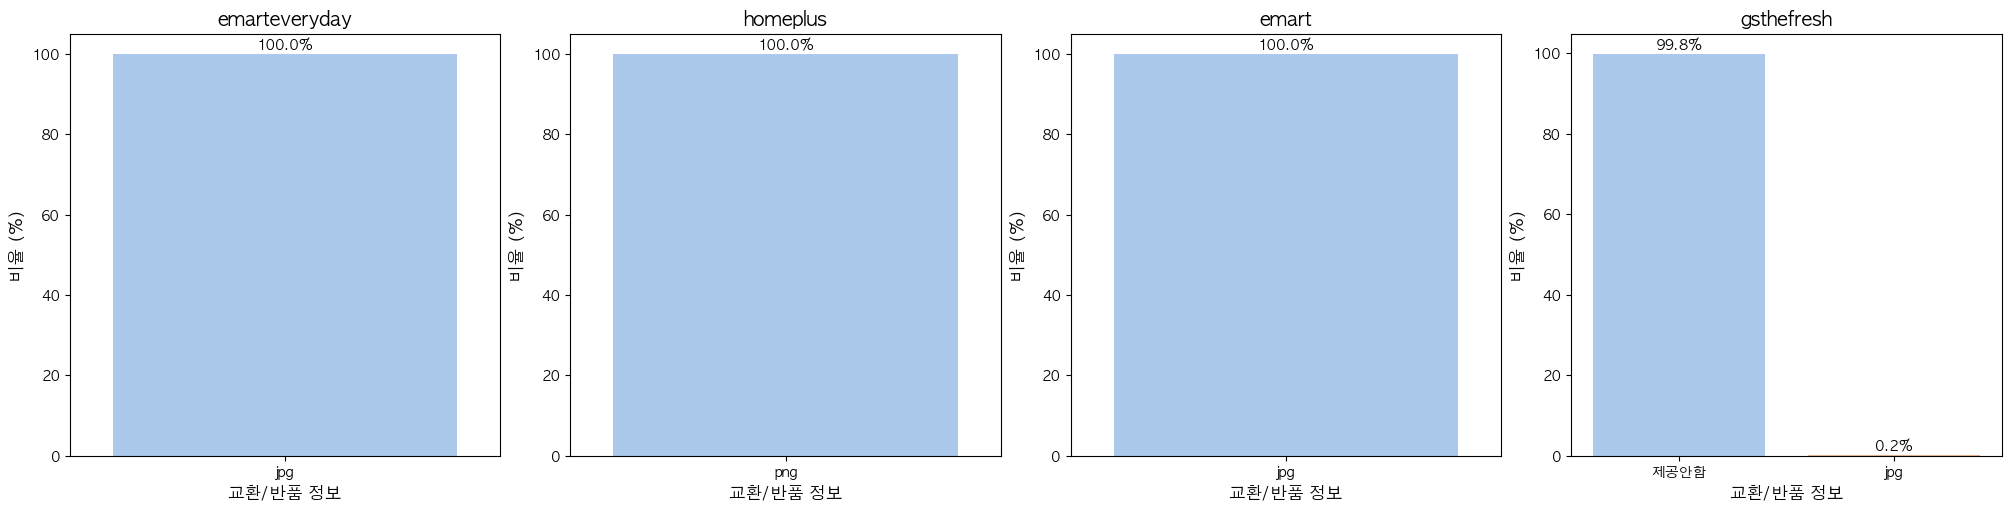

In [12]:
num_malls = len(malls)
fig, axes = plt.subplots(1, num_malls, figsize=(5 * num_malls, 5), constrained_layout=True)

for i, mall in enumerate(malls):
    mall_df = total_df[total_df["idx"].str.contains(mall)]
    
    if mall_df.empty:
        continue

    ratio_df = mall_df["교환/반품 정보"].value_counts(normalize=True) * 100

    palette = sns.color_palette("pastel", n_colors=ratio_df.index.nunique())
    sns.barplot(ax=axes[i], x=ratio_df.index, y=ratio_df.values, palette=palette, hue=ratio_df.index, legend=False)

    axes[i].set_title(f"{mall}", fontsize=14)
    axes[i].set_xlabel("교환/반품 정보", fontsize=12)
    axes[i].set_ylabel("비율 (%)", fontsize=12)
    # axes[i].set_xticklabels(ratio_df.index, rotation=45)  # X축 레이블 회전

    # 값 표시
    for j, v in enumerate(ratio_df.values):
        axes[i].text(j, v + 1, f"{v:.1f}%", ha="center", fontsize=10)

# 전체 그래프 출력
plt.show()

### 배송 정보
- 제공 형태 파악

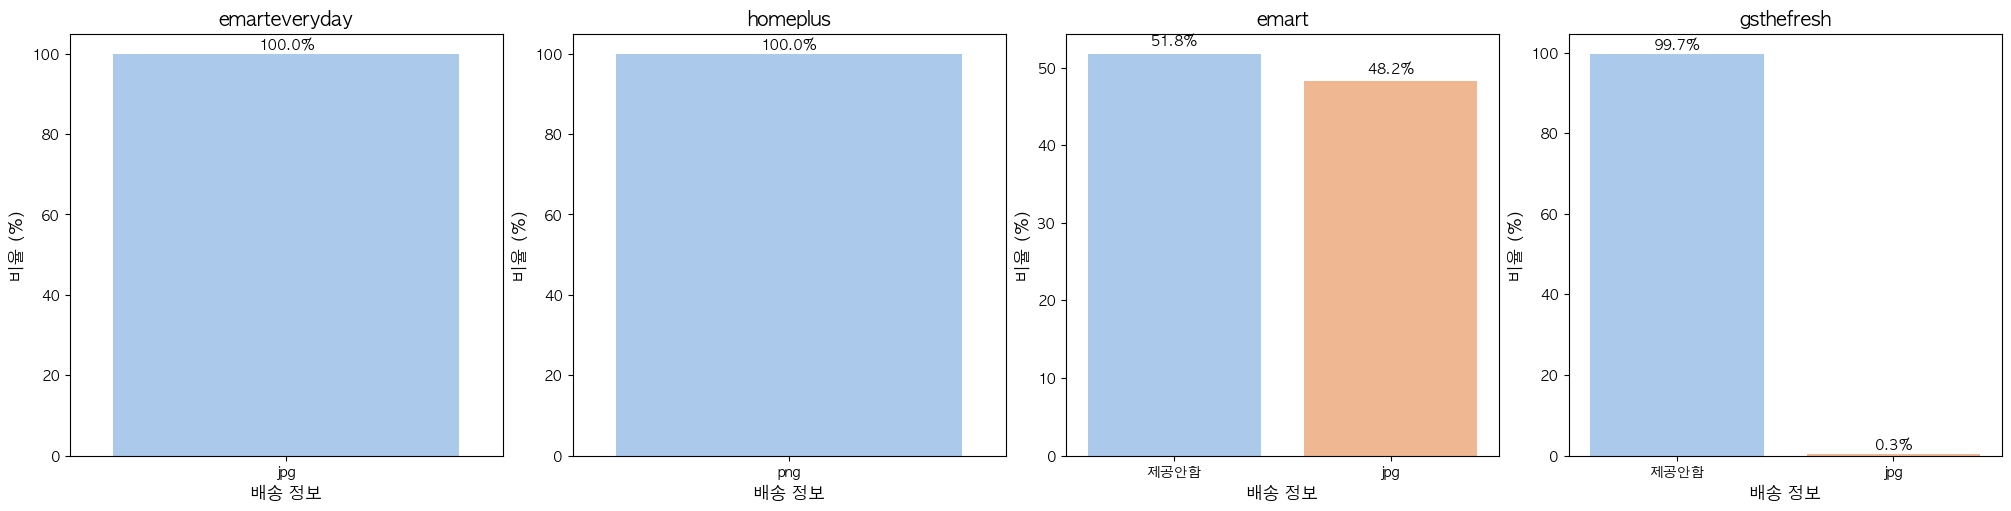

In [13]:
num_malls = len(malls)
fig, axes = plt.subplots(1, num_malls, figsize=(5 * num_malls, 5), constrained_layout=True)

for i, mall in enumerate(malls):
    mall_df = total_df[total_df["idx"].str.contains(mall)]
    
    if mall_df.empty:
        continue

    ratio_df = mall_df["배송 정보"].value_counts(normalize=True) * 100

    palette = sns.color_palette("pastel", n_colors=ratio_df.index.nunique())
    sns.barplot(ax=axes[i], x=ratio_df.index, y=ratio_df.values, palette=palette, hue=ratio_df.index, legend=False)

    axes[i].set_title(f"{mall}", fontsize=14)
    axes[i].set_xlabel("배송 정보", fontsize=12)
    axes[i].set_ylabel("비율 (%)", fontsize=12)
    # axes[i].set_xticklabels(ratio_df.index, rotation=45)  # X축 레이블 회전

    # 값 표시
    for j, v in enumerate(ratio_df.values):
        axes[i].text(j, v + 1, f"{v:.1f}%", ha="center", fontsize=10)

# 전체 그래프 출력
plt.show()